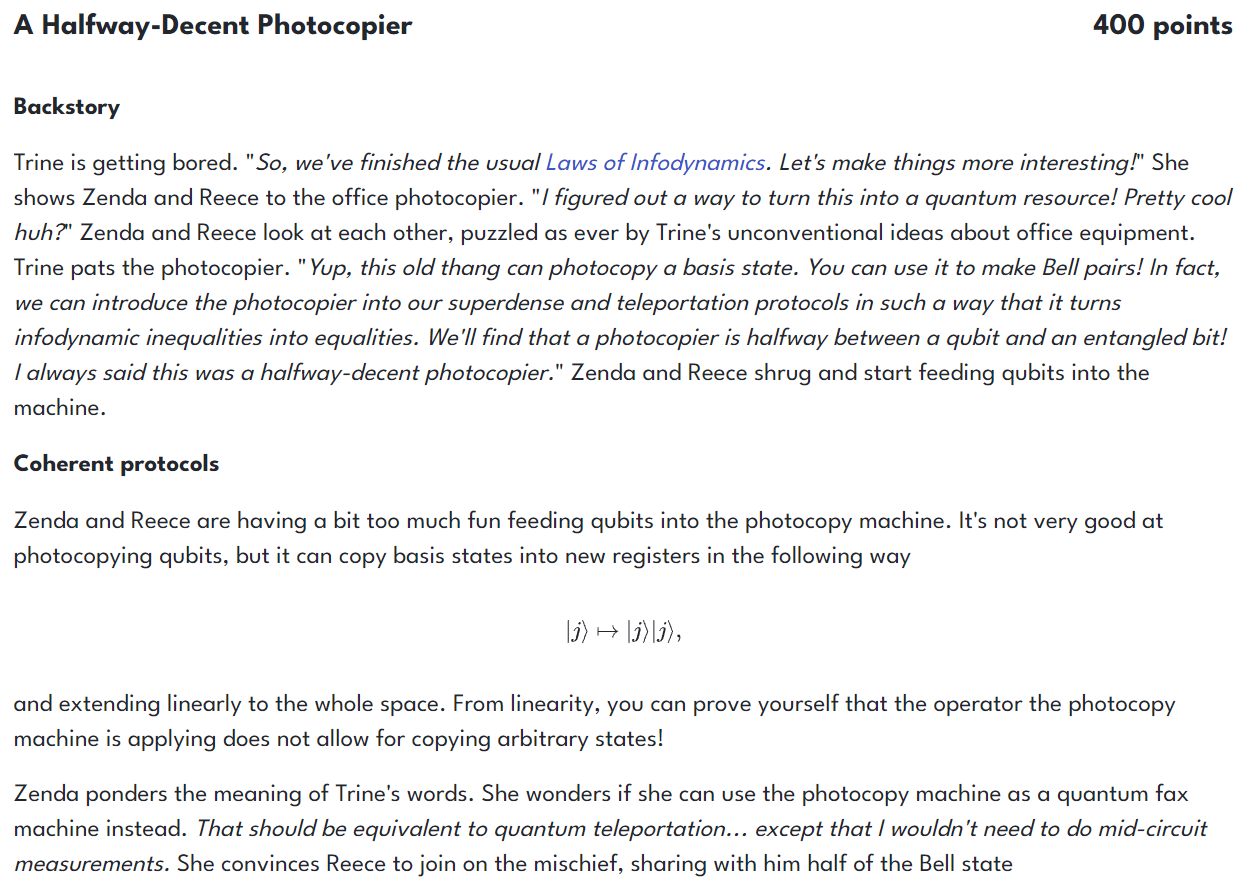

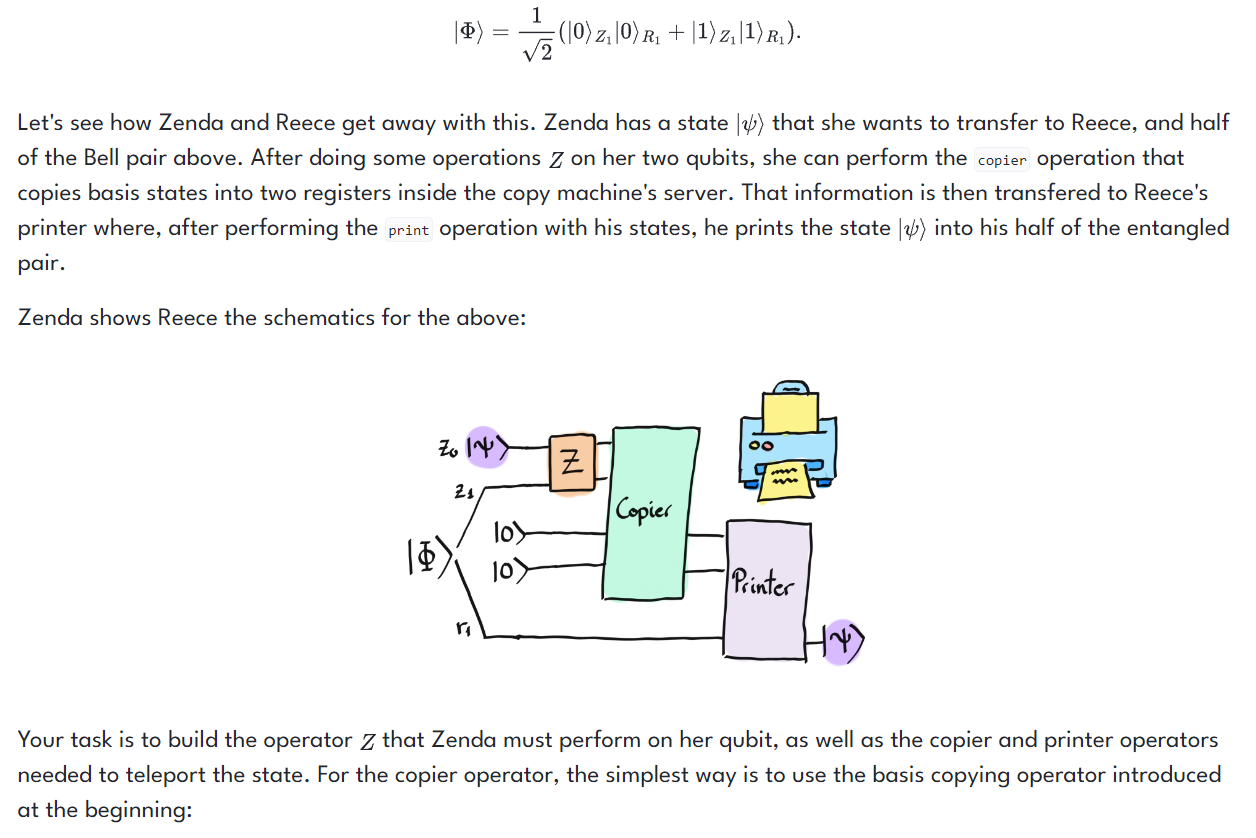

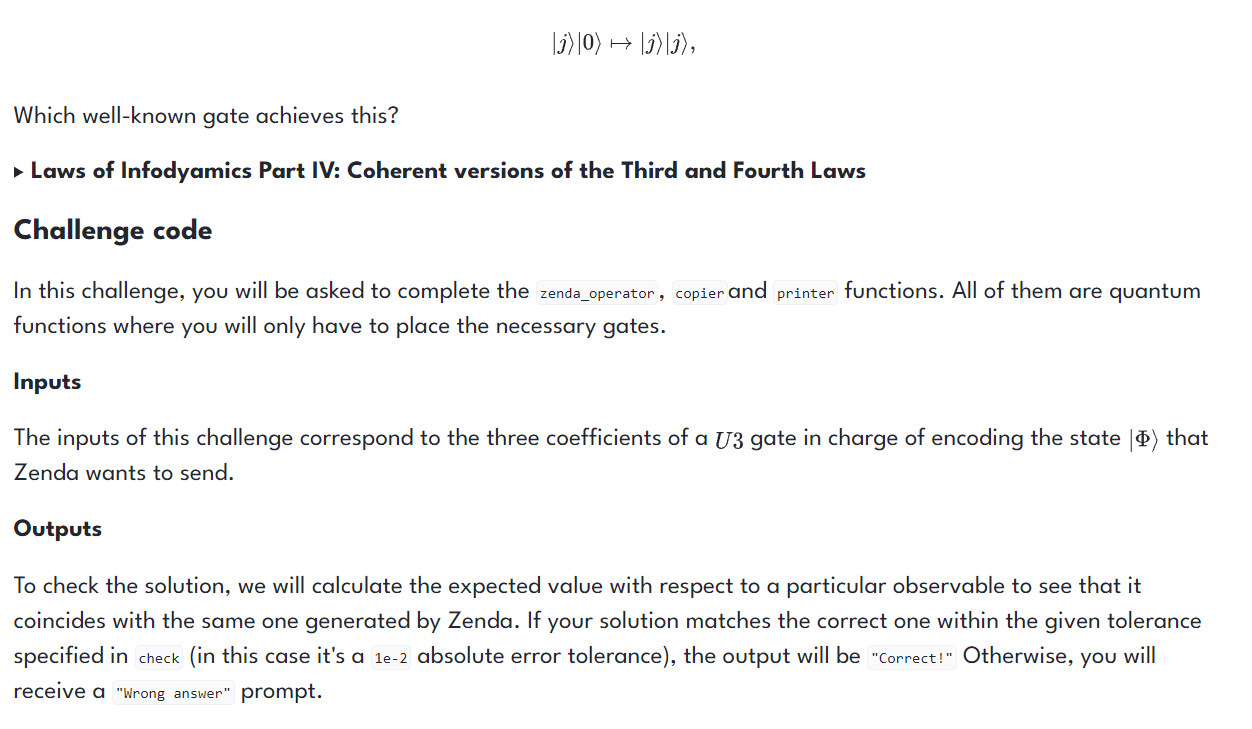

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

def zenda_operator():
    """
    Quantum function corresponding to the operator to be applied by
    Zenda on her qubits. This function does not return anything,
    you must simply write the necessary gates.
    """


    # Put your code here #


def copier():
    """
    Quantum function encoding the copy operation cone by Zenda, on each qubit.
    This function does not return anything, you must simply write the necessary gates.
    """


    # Put your code here #


def printer():
    """
    Quantum function encoding the print operation done by Reece's printer.
    This function does not return anything, you must simply write the necessary gates.
    """


    # Put your code here #


def bell_generator():
    """
    Quantum function preparing bell state shared by Reece and Zenda.
    """

    qml.Hadamard(wires=["z1"])
    qml.CNOT(wires=["z1", "r1"])


dev = qml.device("default.qubit", wires=["z0", "z1", "r1", "s0", "s1"])

@qml.qnode(dev)
def circuit(alpha, beta, gamma):

    # we encode the initial state
    qml.U3(alpha, beta, gamma, wires = "z0")

    bell_generator()

    # Zenda acts on her qubits and establishes and copies them.
    zenda_operator()
    copier()


    # Reece programs his printer
    printer()

    # Here we are returning the expected value with respect to any observable,
    # the choice of observable is not important in this exercise.

    return qml.expval(0.25 * qml.PauliX("r1") + qml.PauliY("r1"))


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    angles = json.loads(test_case_input)
    output = circuit(*angles)
    return str(output)


def check(solution_output: str, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, atol=2e-1
    ), "The expected output is not quite right."

    try:
        dev1 = qml.device("default.qubit", wires = ["z0", "z1"])
        @qml.qnode(dev1)
        def circuit1():
            zenda_operator()
            return qml.probs(dev1.wires)
        circuit1()
    except:
        assert False, "zenda_operator can only act on z0 and z1 wires"

    try:
        dev1 = qml.device("default.qubit", wires = ["z0", "z1", "s0", "s1"])
        @qml.qnode(dev1)
        def circuit1():
            copier()
            return qml.probs(dev1.wires)
        circuit1()
    except:
        assert False, "copy can only act on z0, z1, s0 and s1 wires"


    try:
        dev1 = qml.device("default.qubit", wires = ["s0", "s1", "r1"])
        @qml.qnode(dev1)
        def circuit1():
            printer()
            return qml.probs(dev1.wires)
        circuit1()
    except:
        assert False, "Reece's printer can only act on s0, s1 and r1 wires"


test_cases = [['[1,1,1]', '0.8217355966267811'], ['[1.2,1.3,1.4]', '0.9604037313446201']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")